In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile

# Define the path to your zip file
file_path = '/content/archive.zip'

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')

In [8]:
import pandas as pd
import glob
train_df = pd.read_csv('/content/drive/MyDrive/kaggle/Data_Entry_2017.csv')
image_label_map = pd.read_csv('/content/drive/MyDrive/kaggle/train_df.csv')
bad_labels = pd.read_csv('/content/drive/MyDrive/kaggle/cxr14_bad_labels.csv')

# Listing all the .jpg filepaths
image_paths = glob.glob('/content/drive/MyDrive/kaggle'+'images_*/images/*.png')
print(f'Total image files found : {len(image_paths)}')
print(f'Total number of image labels: {image_label_map.shape[0]}')
print(f'Unique patients: {len(train_df["Patient ID"].unique())}')

image_label_map.drop(['No Finding'], axis = 1, inplace = True)
labels = image_label_map.columns[2:-1]
labels

Total image files found : 0
Total number of image labels: 111863
Unique patients: 30805


Index(['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax', 'Pleural_Thickening',
       'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation'],
      dtype='object')

In [9]:
train_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [10]:
train_df.shape

(112120, 12)

In [11]:
image_label_map.shape

(111863, 17)

In [12]:
train_df.rename(columns={"Image Index": "Index"}, inplace = True)
image_label_map.rename(columns={"Image Index": "Index"}, inplace = True)
train_df = train_df[~train_df.Index.isin(bad_labels.Index)]
train_df.shape

Index =[]
for path in image_paths:
    Index.append(path.split('/')[5])
index_path_map = pd.DataFrame({'Index':Index, 'FilePath': image_paths})
index_path_map.head()

pd.merge(train_df, index_path_map, on='Index', how='left')

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,FilePath
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111858,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN,NaN
111859,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN,NaN
111860,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN,NaN
111861,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN,NaN


In [13]:
pd.merge(train_df, index_path_map, on='Index', how='left')

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,FilePath
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111858,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN,NaN
111859,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN,NaN
111860,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN,NaN
111861,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN,NaN


<ipython-input-15-ee502de609e7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette="viridis")


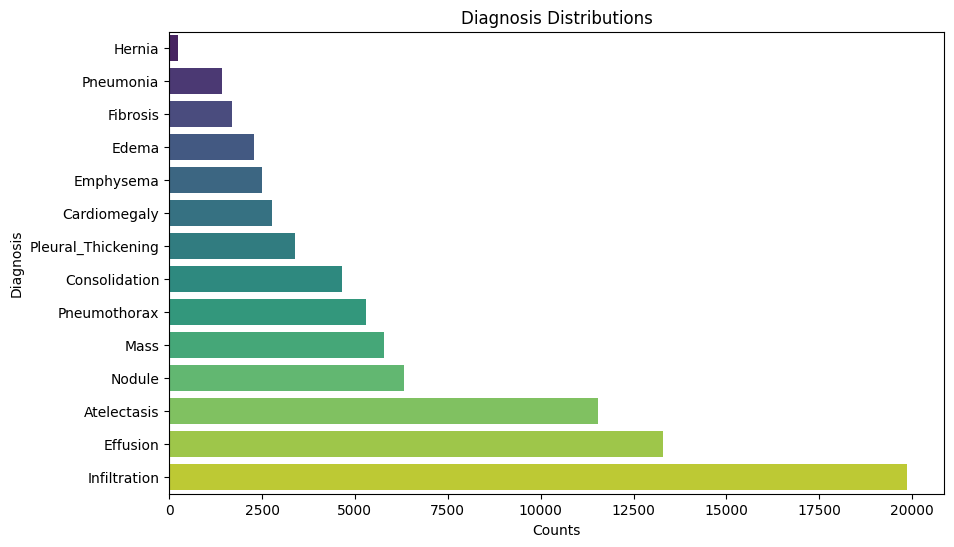

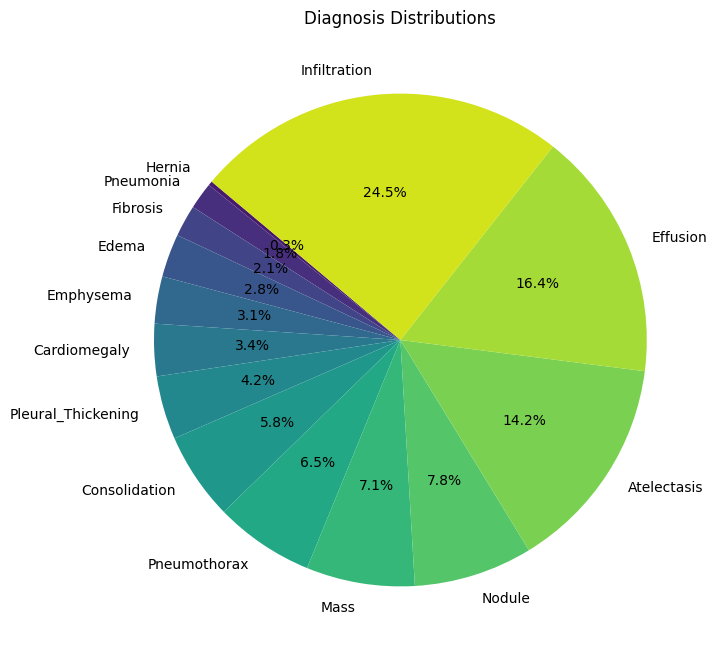

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data and labels are already defined
data = image_label_map[labels].sum(axis=0).sort_values(ascending=True)

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=data.values, y=data.index, palette="viridis")
plt.title('Diagnosis Distributions')
plt.xlabel('Counts')
plt.ylabel('Diagnosis')
plt.show()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(data)))
plt.title('Diagnosis Distributions')
plt.show()
